<a href="https://colab.research.google.com/github/hillerj1/PHY_310/blob/main/Joshweek3_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Numerical Integration Methods

## Library Imports Go Here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time
import random
import math

## The Basic Integration Functions

### Box Integration

<font color = blue>
    
Write a function that implements the box approximation method.  Your function should take, as inputs, a function `function`, the lower and upper integration limits `x_initial` and `x_final`. and the number of rectangles to be used in the approximation `divisons`.  It should return the result of the approximation.

In [ ]:
def f(x):
    return (x**2)

def integrate_box(f, x_initial, x_final, divisions):
    del_x = (x_final-x_initial)/divisions
    a_net = 0

    for n in range(int(divisions)):
        x_left = x_initial + n * del_x
        area = f(x_left) * del_x
        a_net += area

    return a_net

print(integrate_box(f, 0, 1, 1000))
print(integrate_box(f, 0, 1, 100))


0.33283350000000034
0.32835000000000014


### Trapezoid Integration

<font color = blue>
    
Write a second function that does the same thing, but uses the trapezoidal method.  (If you want to, you can make this second function *use* the first function.)

In [ ]:
def integrate_trap(f, x_initial, x_final, divisions):
    i_box = integrate_box(f, x_initial, x_final, divisions)
    del_x = (x_final-x_initial)/divisions
    correction = (f(x_initial) + f(x_final)) * del_x / 2
    a_net = i_box + correction

    return a_net

integrate_trap(f, 0, 1, 1000)

0.33333350000000034

### Testing, testing

<font color = blue>
Test both of your pieces of code on the function

$$
f(x) = \frac{x^2}{2}
$$

with the limits of integration $[-1, 3]$ and `divisions`$ = 100$.  Also, as a **discussion** work out the integral analytically, and compare the results.

In [ ]:
def f(x):
    return (x**2)/2

print(f'Box Integration: {integrate_box(f, -1, 3, 100)}')
print(f'Trapazoidal Integration: {integrate_trap(f, -1, 3, 100)}')

Box Integration: 4.587200000000002
Trapazoidal Integration: 4.687200000000002


Solving the integral analytically I get 14/3 or 4.666... Solving this kind of function analytically is definitly more efficient if you are aiming for accuracy, although if you are aiming for speed and efficiency, calculating it how I did above is definitly better.

## Gaussian Integration

<font color = blue>
We now want to use out numerical integration method to approximate the Gaussian integral

$$
\int_{-\infty}^{\infty} e^{-x^2} \, dx
$$

which has the known analytic value $\sqrt{\pi}$.  Here there is an additional challenge, becuase we can't expect to use $\pm\infty$ as inputs for our numerical work.

### Plotting the Function

<font color = blue>
Begin by plotting the function $e^{-x^2}$.  This becomes approximately zero, far enough from $x = 0$.  Use the plot to appropriately choose limits of integration to use in the numerical work.

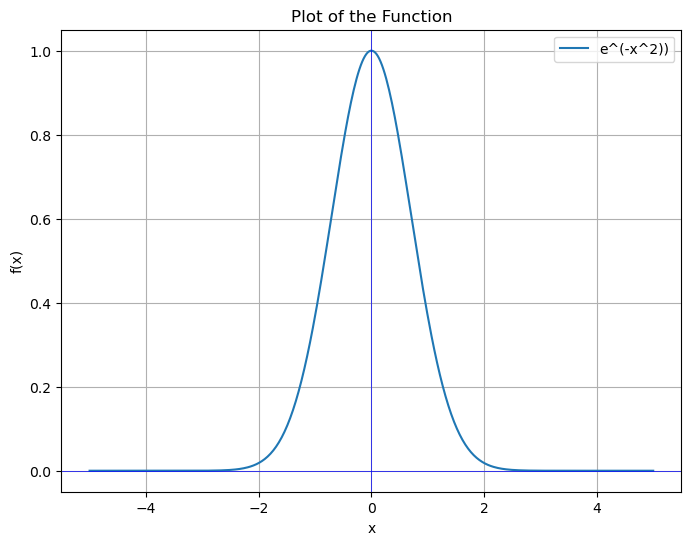

In [ ]:
def f(x):
    return np.exp(-x**2)

x = np.linspace(-5, 5, 400)
y = f(x)

# Plots the function and returns the roots
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='e^(-x^2))')
plt.axhline(0, color='b',linewidth=0.5)
plt.axvline(0, color='b',linewidth=0.5)
plt.title("Plot of the Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

### Evaluating the Integral

<font color = blue>
Using these limits, evaluate the Gaussian integral with your trapezoidal approximation function, and compare the result with the analytic value

In [ ]:
def f(x):
    return np.exp(-x**2)

print(f'Common square root of pi: {np.sqrt(np.pi)}')

print(f'Gaussian Integration using trapazoidal integration: {integrate_trap(f, -5, 5, 1000)}')


Common square root of pi: 1.7724538509055159
Gaussian Integration using trapazoidal integration: 1.772453850902928


### Sources of Error

<font color = blue>
    
The evaluation you have done actually has two sources of error: the error associated with approximating an integral as a series of trapezoidal areas, and the error associated with cutting off the region of integration.  It's instructive to know how much each is contributing to the error, and which is most significant.  (This will, of course, depend on your choices of `divisions` and the region of integration.)

Compute the approximation of the integral for some value of `divisions`, and then again for twice that value.  This decreasees the width of each trapezoid by $\frac{1}{2}$, and should make the approximation better.  Calculate the difference between the two results.

Then compare the result you had for your first value of `divisions` with a result where you double the total size of your region of integration.  You should also double your value of `divisions`, so that the width of each trapezoid is unchanged.  Calculate the difference between the original result and this result.

Finally, **discuss** the results of this analysis.

Note that this technique for analyzing numerical errors -- doubling (or cutting in half) a numerical parameter and seeing how much the result changes -- shouldn't be thought of as a rigorous, formal method.  But it is a good way to get a rough sense of scale for numerical errors.

In [ ]:
# checking for error in how many divisions assigned to trapezoidal integration
first_div = integrate_trap(f, -5, 5, 1000)
second_div = integrate_trap(f, -5, 5, 2000)
error_in_div = first_div - second_div
print(f'Error in divisions (after doubled): {error_in_div}')

# checking for error in size of the region
first_reg = integrate_trap(f, -5, 5, 1000)
second_reg = integrate_trap(f, -10, 10, 2000)
error_in_reg = first_reg - second_reg
print(f'Error in the region (after doubled): {error_in_div}')

Error in divisions (after doubled): 6.59472476627343e-14
Error in the region (after doubled): 6.59472476627343e-14


The sense I get from this analysis of the sources of error, is that the numbers are so small that they are almost negligible. e-14 is a crazy small number, but it shows how precise numerical solutions are. The values are relitivly similar in error, which makes sense since for the divions, doubling the iterations would allow for more specificity. And when I doubled the regions and the divisions, it also makes sense it would be about the same since not only was I doubling the divisions again but I was also extending the region to [-10,10], which is not going to do much given the function asympotes at around y=0 at x=-5 and x=5

## The Sinc Function

<font color = blue>
    
Now we want to work at approximating the integral

$$
\int_{0}^{10} \frac{\sin x}{x} \, dx
$$

Although the integrand is actually finite for all values of $x$, a computer is going it have trouble evaluating it at $x = 0$.  The challenge this time is to find a way to work around this difficulty *that does not introduce additional sources of error*.  Explain your approach in a **discussion**, and evaluate the integral using `divisions` = 100.

In [ ]:
def f(x):
    if x == 0:
        return 1
    else:
        return np.sin(x) / x
# integrating the sinc function
integrate_trap(f, 0, 10, 100)

1.7582821963661237

My approach to this problem is to add an if statement into the f(x) function. At the point of the function that x is 0, the function should return, although for any other f(x) where x does not equal 0, the function returns (sin(x))/x. After I added the if statement it seemed to be working properly.

## The Period of the Pendulum

### Creating the Function

<font color = blue>
    
In class we showed that the (dimensionless) period of the pendulum as a function of initial angle $\theta_0$ would be

$$
\tau(\theta_0) = \frac{2}{\pi}\int_{0}^{\pi/2} \frac{1}{\sqrt{1 - \sin^2\frac{\theta_0}{2}\sin^2\phi}} \, d\phi
$$

Create a function that will find the period of the pendulum.  Check its output by evaluating it at $\theta_0 = 0.1$.  Assess whether or not the result makes sense in a **discussion** (what would the result be using the "small angle approximation"?

In [ ]:
def integrand(phi, theta0):
    return (2/np.pi) * 1/(np.sqrt(1-(np.sin(theta0/2))**2*((np.sin(phi))**2)))

# creates a nested function for a single to double variable integration
def period(theta0):
    def something(phi):
        return integrand(phi,theta0)

    return integrate_trap(something, 0, np.pi/2, 100)

period(.1)

1.0106253583077367

This result does make sense. The result of using the small angle approximation is a period of 1. And the code above follows the assumption.

### * Plotting the Period

<font color = blue>
    
Make a plot of $\tau$ as a function of $\theta_0$ over the range $[0, \pi - .01]$.  Add to the plot a horizontal line at $\tau = 1$ and a vertical line at $\theta_0 = \pi$, to make the plot easier to read.  **Discuss** the result thoroughly!

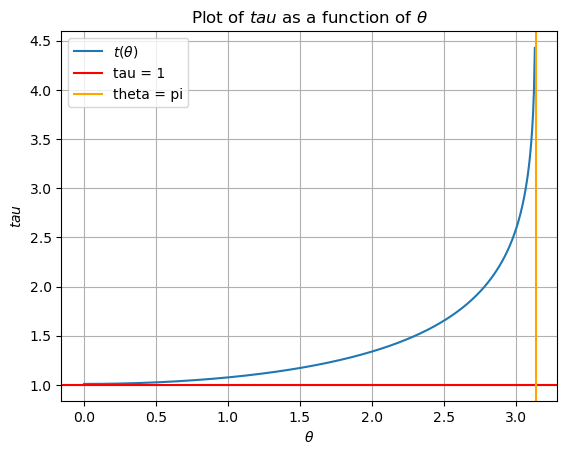

In [ ]:
theta_values = np.linspace(0, np.pi - 0.01, 500)
t_values = period(theta_values)

# plotting the period of a pendulum
plt.plot(theta_values, t_values, label=r'$t(\theta)$')
plt.axhline(y = 1, color = 'r', label = 'tau = 1')
plt.axvline(x = np.pi, color = 'orange', label = 'theta = pi')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$tau$')
plt.title('Plot of $tau$ as a function of $\\theta$')
plt.grid(True)
plt.legend()
plt.show()

The plot above shows tau as a function of theta. As you can see the graph seems to asymptote at pi and 1. This makes sense even in reality. A pendulum cannot have a period of less than 1 (given the small angle approximation) and more than pi (given the pendulum starts exactly vertical).

## Simpson's Method

### The Basic Function

<font color = blue>
    
Write a function that implements Simpson's method.  It should have the same input structure as your box and trapazoidal integration functons.

Since in this case `divisions` must be an even integer, in the event that the user inputs a value that is not an even integer have the function approximate `divisions` as the nearest even integer to the one provided, and then proceed with the calculation.

In [ ]:
# Basic function I know the answer to
def f(x):
    return (x**2)

# Implementing integrating via the simpson technique
def i_simpson(f, x_initial, x_final, divisions):
    if int(float(divisions)) % 2 != 0:
        divisions = math.ceil(divisions / 2.) * 2

    del_x = (x_final-x_initial)/divisions
    a_net = 0

    for j in range(int((divisions/2))):
        f2j = f(x_initial + (2*j*del_x))
        f2j1 = f(x_initial + (((2*j)+1)*del_x))
        f2j2 = f(x_initial + (((2*j)+2)*del_x))
        area = f2j + (4*f2j1) + f2j2
        a_net += area

    return (del_x/3) * a_net

i_simpson(f, 0, 1, 1000)

0.33333333333333337

### Testing

<font color = blue>
Test your code on the same function

$$
f(x) = \frac{x^2}{2}
$$

that you previously used for the box and trapezoidal integrals.  Note that since this is quadratic, the Simpson method should give the *exact* correct answer (except for rounding errors).

In [ ]:
def f(x):
    return (x**2)/2

# Looks like it is working perfectly
i_simpson(f, -1, 3, 1000)

4.666666666666666

## Comparing Accuracy

<font color = blue>
    
You now have three separate pieces of code for implementing approximations to an integral, each with greater accuracy than the last.  This is a good opportunity to quantitatively compare the methods.  We will use the integral

$$
\int_{0}^{1} x^5 \, dx
$$

to examine the accuracy.  For each method, the number `divisions` controls how accurate the method is.  Specifically, we have the width of each region $\Delta x \propto \frac{1}{\mathrm{divisions}}$, and we expect the amount of error to decrease, the smaller $\Delta x$ is.

In [ ]:
def f(x):
    return (x**5)
# comparing accuracy of the different integration methods
print('box', integrate_box(f, 0, 1, 1000))
print('trap', integrate_trap(f, 0, 1, 1000))
print('simpson', i_simpson(f, 0, 1, 1000))

box 0.16616708333325006
trap 0.16666708333325006
simpson 0.16666666666699995


### Analytic Calculation

<font color = blue>
    
Begin by working out the integral analytically as a **discussion**.

$\int^1_0{x^5} dx = \frac{1}{6}x^6 \vert^1_0 = \frac{1}{6}$

### Box Integration Accuracy

<font color = blue>
    
For the box integration method, we expect the amount of error to be proportional to $\Delta x$, and thus to $\frac{1}{N}$ (where $N$ = `divisions`).

Compute an array of the results of the box integral for values of N between 100 and 1000 in steps of 10.   Plot these results and confirm the essential behavior is correct.

Then, use the command `curve_fit` from the module `scipi.optimize` to fit this data to a function of the form
$$
C + \frac{A}{N}
$$
where $C$ is the analytic result of the integral.  (Look up the documentation to figure out how to do this!)  Display this fitted curve together with the data on a single plot.

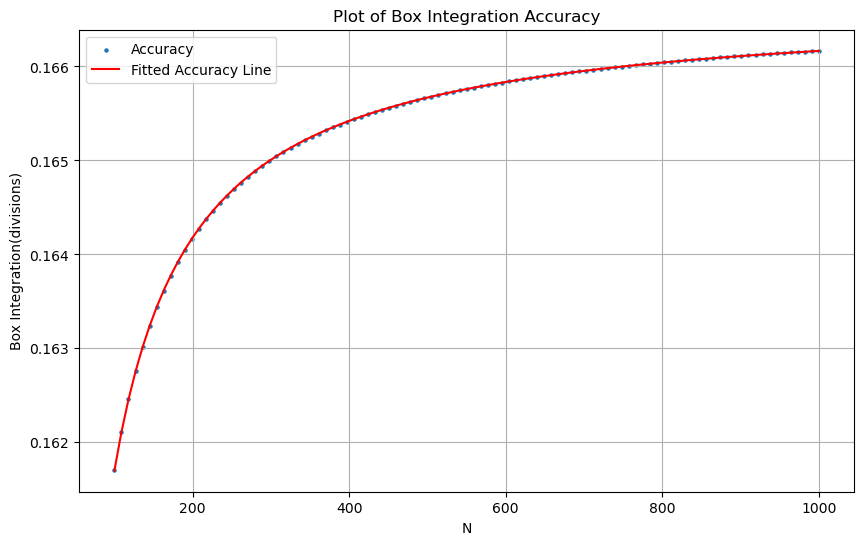

In [ ]:
# plotting the accuracy of box integration as the iterations increase (N)
divisions = np.linspace(100, 1000, 101)
integral_box = np.array([])
for i in divisions:
    integral_box = np.append(integral_box, integrate_box(f, 0, 1, i))

def func(n, a, c):
    return c + (a/n)

parameters, covariance = curve_fit(func, divisions, integral_box)

plt.figure(figsize=(10, 6))
plt.scatter(divisions, integral_box, label='Accuracy', s = 5)
plt.plot(divisions, func(divisions, *parameters), color = 'r', label = 'Fitted Accuracy Line')
plt.xlabel('N')
plt.ylabel('Box Integration(divisions)')
plt.title('Plot of Box Integration Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Trapezoid Integration Accuracy

<font color = blue>
Repeat the above procedure, but this time using the Trapezoid integration method, where the error should decrease as $\frac{1}{N^2}$.

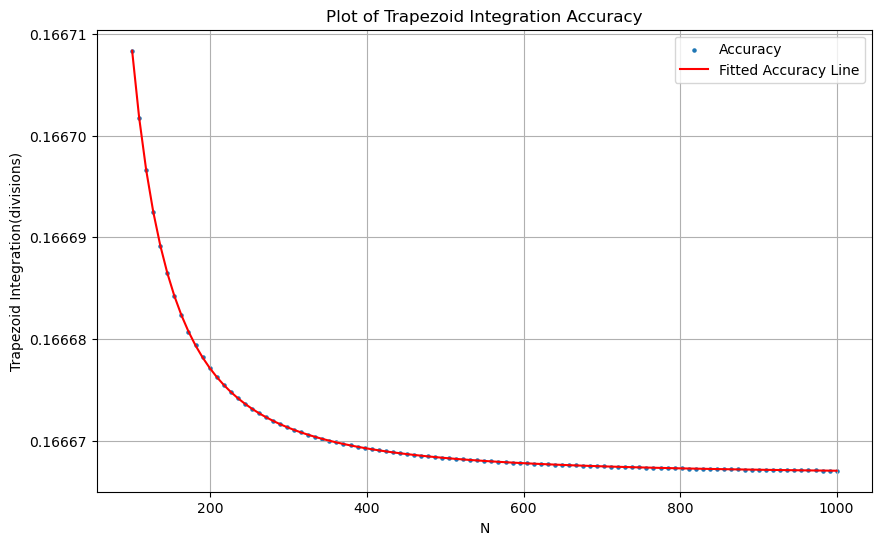

In [ ]:
# plotting the accuracy of trapezoidal integration as the iterations increase (N)
divisions = np.linspace(100, 1000, 101)
integral_trap = np.array([])
for i in divisions:
    integral_trap = np.append(integral_trap, integrate_trap(f, 0, 1, i))

def func(n, a, c):
    return c + (a/n**2)

parameters, covariance = curve_fit(func, divisions, integral_trap)

plt.figure(figsize=(10, 6))
plt.scatter(divisions, integral_trap, label='Accuracy', s = 5)
plt.plot(divisions, func(divisions, *parameters), color = 'r', label = 'Fitted Accuracy Line')
plt.xlabel('N')
plt.ylabel('Trapezoid Integration(divisions)')
plt.title('Plot of Trapezoid Integration Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Simpson's Rule Accuracy

<font color = blue>
Finally, repeat the exercise one more time, with Simpson's rule, which we expect to have errors that scale as $\frac{1}{N^4}$.

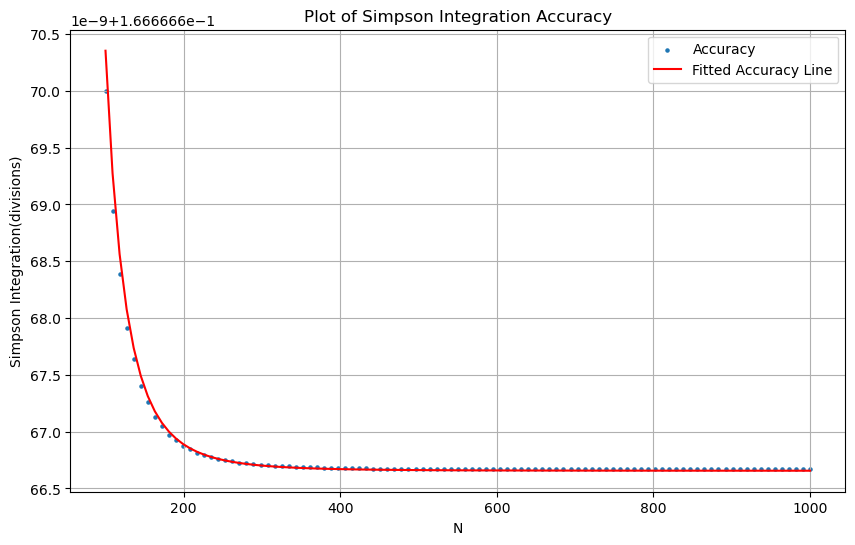

In [ ]:
# plotting the accuracy of Simpson integration as the iterations increase (N)
divisions = np.linspace(100, 1000, 101)
integral_simp = np.array([])
for i in divisions:
    integral_simp = np.append(integral_simp, i_simpson(f, 0, 1, i))

def func(n, a, c):
    return c + (a/n**4)

parameters, covariance = curve_fit(func, divisions, integral_simp)

plt.figure(figsize=(10, 6))
plt.scatter(divisions, integral_simp, label='Accuracy', s = 5)
plt.plot(divisions, func(divisions, *parameters), color = 'r', label = 'Fitted Accuracy Line')
plt.xlabel('N')
plt.ylabel('Simpson Integration(divisions)')
plt.title('Plot of Simpson Integration Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Discussion

```
```

<font color = blue>

**Discuss** the results of this analysis.

The above graphs show the increasing accuracy of the integration methods and the N values that allow the most accuracy. For example, the box and trapezoidal integration algorithms look very similar in that they require about the same amount of iterations before they are as accurate as they can get, although the Simpson method is far more accurate. In the same amout of iterations the solution is a lot more precise.

## The Line of Charge

<font color = blue>
Here we want to compute and display the electric field in the vicinity of a line of charge with varying charge density (in dimensionless form)

$$
\lambda(s) = \frac{1}{1 + s^2}
$$

which generates an (also dimensionless) electric field with components

$$
E_x(x, y) = \int_{-\infty}^{\infty} \left(\frac{1}{1 + s^2}\right)\left(\frac{x - s}{((x -s)^2 + y^2)^{3/2}}\right) \, ds
$$

$$
E_y(x, y) = \int_{-\infty}^{\infty} \left(\frac{1}{1 + s^2}\right)\left(\frac{y}{((x -s)^2 + y^2)^{3/2}}\right) \, ds
$$

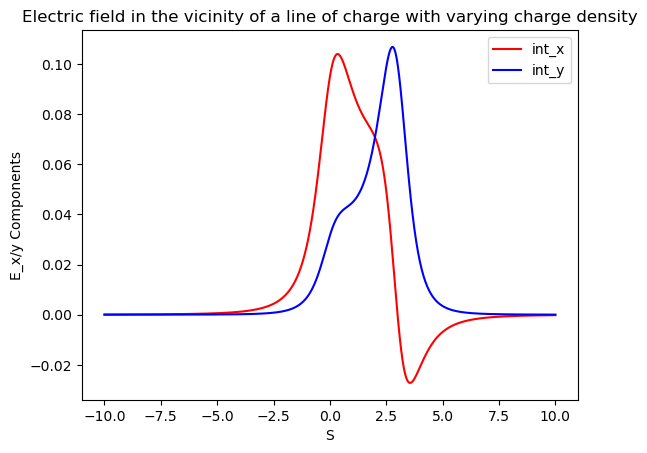

In [ ]:
x = 3
y = 1

# creating the integrands for Ex and Ey
def int_x(s):
    first_part = 1/(1+s**2)
    second_part1 = (x-s)/(((x-s)**2+y**2)**(3/2))
    return first_part * second_part1

def int_y(s):
    first_part = 1/(1+s**2)
    second_part2 = (y)/(((x-s)**2+y**2)**(3/2))
    return first_part * second_part2

s = np.linspace(-10, 10, 1000)

# plotting the integrands after assigning them initial x and y values
plt.plot(s, int_x(s), color = 'r', label = 'int_x')
plt.plot(s, int_y(s), color = 'b', label = 'int_y')
plt.xlabel('S')
plt.ylabel('E_x/y Components')
plt.title('Electric field in the vicinity of a line of charge with varying charge density')
plt.legend()
plt.show()

### Limits of Integration

<font color = blue>

We know we cannot use "infinity" as a limit of integration in numerical work, so we must begin by choosing appropriate limits of integration.  In this case, the story is complicated by the fact that the behavior of the integrand will depend on the input values of $x$ and $y$ -- the location at which we want to evaluate the electric field.  

Later on, we will restrict our attention to locations in the square region $[-10, 10]$ and $[-10, 10]$.  So below, make sure that your choices of integration cut-offs will work for this entire range of locations (except for *on* the x-axis, where the integrands are badly behaved).
    
Then, **discuss** how you approached this challenge and what the results of your analysis were.

Enter a value of x within the range [-10, 10]: 34
Enter a value of y within the range [-10, 10]: 3
Enter a vlae of X WITHIN THE RANGE [-10, 10]!!!: 5


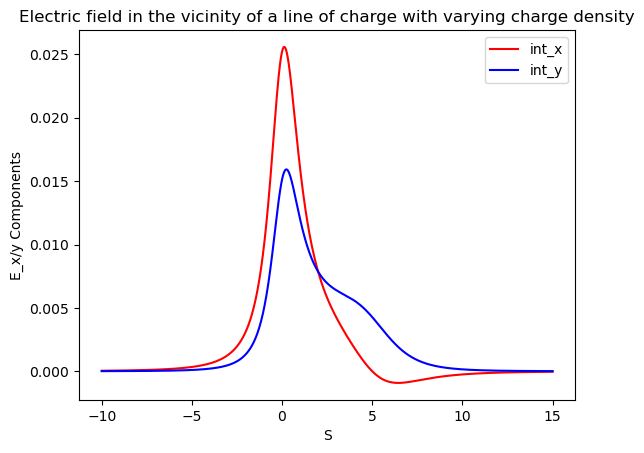

In [ ]:
# plotting the integrands Ex and Ey after asking the user for initial positions
x = float(input('Enter a value of x within the range [-10, 10]:'))
y = float(input('Enter a value of y within the range [-10, 10]:'))

# checking if the user inputed allowed values
if (x < -10) or (x > 10):
    x = float(input('Enter a vlae of X WITHIN THE RANGE [-10, 10]!!!:'))

if (y < -10) or (y > 10):
    y = float(input('Enter a value of Y WITHIN THE RANGE [-10, 10]!!!:'))


def int_x(s):
    first_part = 1/(1+s**2)
    second_part1 = (x-s)/(((x-s)**2+y**2)**(3/2))
    return first_part * second_part1

def int_y(s):
    first_part = 1/(1+s**2)
    second_part2 = (y)/(((x-s)**2+y**2)**(3/2))
    return first_part * second_part2

s = np.linspace(-10, 15, 1000)

plt.plot(s, int_x(s), color = 'r', label = 'int_x')
plt.plot(s, int_y(s), color = 'b', label = 'int_y')
plt.xlabel('S')
plt.ylabel('E_x/y Components')
plt.title('Electric field in the vicinity of a line of charge with varying charge density')
plt.legend()
plt.show()

I made two inputs where the user could input the x and y values and if it was outside of the range [-10,10] and [10, 10], then I had the user re-input the values within that range.

### Essential Function

<font color = blue>
    
Now write a function that takes as inputs $x$ and $y$, and outputs $[E_x, E_y]$ as an array.  

Test your function for a choice of $x$ and $y$ that is "close to" the center, and for a choice that is "far away" (but make sure $-10, < x, y < 10$.)  

As a **discussion**, confirm that both results match the analytic expectations.

In [ ]:
# creating a nested function to turn a double variable function into two single variable functions
def e_field(x, y):
    def int_x(s):
        first_part = 1/(1+s**2)
        second_part1 = (x-s)/(((x-s)**2+y**2)**(3/2))
        return first_part  * second_part1

    def int_y(s):
        first_part = 1/(1+s**2)
        second_part2 = (y)/(((x-s)**2+y**2)**(3/2))
        return first_part * second_part2
# integrating Ex and Ey using simpson's rule
    e_simp_x = i_simpson(int_x, -15, 15, 1000)
    e_simp_y = i_simpson(int_y, -15, 15, 1000)
    e_field_simp = np.array([e_simp_x, e_simp_y])
    return e_field_simp

e_field(.1, .2)

array([0.3805945 , 9.36408992])

**Qualitativly:**
I believe that this looks good! When I test it with the values (-10, 10) the output of the field seems to be "close" to zero, which makes sense since the line of charge is being observed as a point charge. Although, when I plug in (.1, .1), the x value is still small but the y value is much larger. This makes sense since from that x,y point, the line of charge seems to go on for infinity, almost as if the point is on the line.
**Quantitativly:**
For the point (-10, 10), my function above calculated the field to be (0.01005107, 0.01128555). Analytically, I calculated it to be (.01110721, .01110721). These are very similar values for treating the line of charge as a "point". For the point (.1, .2), my function calculated the field to be (0.3805945 , 9.36408992). Analytically, I found the values to be (0, 10). While a bit further from my functions' solution, the answer still seems to be pretty accurate.

### Timing Analysis and Grid Selection

```
```

<font color = blue>

Use the `time` function (from the `time` module) to estimate how long it takes to compute a single pair $(E_x,E_y)$.  Based on this calculation (and how long you're willing to wait to get your computational results),  decide on a set of $(x, y)$ coordinates that cover the range $x, y \in [-10, 10]$.  Make sure you *do not* have any points that lie exactly on the line $y = 0$, as this will involve a divergent integrand.  

You will also need a grid that covers the range $x, y \in [-1, 1]$ (but this should be easy to do once you have the first grid).

**Discuss** the decisions you made and how you came to them.

In [ ]:
# found the amount of time it takes for my computer to run one iteration of e_field
# decided on how many grid points I wanted
start_time = time.time()
e_field(2,4)
end_time = time.time()
elapsed_time = end_time - start_time

print(f'Seconds for 1 computation: {elapsed_time}')
print(f'# of points in 5 seconds: {5 / elapsed_time}')
print(f'# of points on each axis: {np.sqrt(5/elapsed_time)}')

Seconds for 1 computation: 0.0009570121765136719
# of points in 5 seconds: 5224.593921275536
# of points on each axis: 72.28135251415496


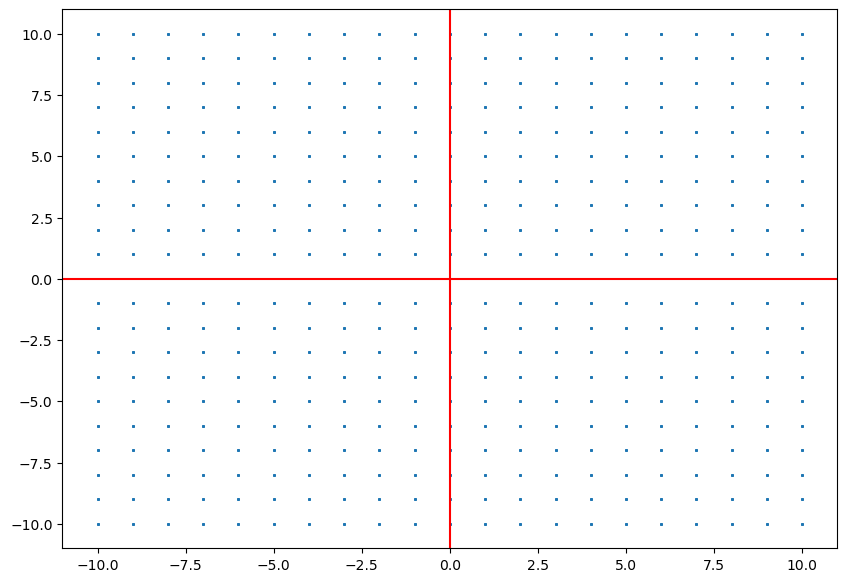

In [ ]:
# practicing/creating a grid for the e_field diagram
x_values_top = [i for i in range(-10, 11)] * 40
x_values_bottom = [i for i in range(-10, 11)] * 40
y_values_top = []
y_values_bottom = []
for i in range(1, 11):
    y_values_top = y_values_top + [i]*84
for i in range(-10, 0):
    y_values_bottom = y_values_bottom + [i]*84

x_values = x_values_top + x_values_bottom
y_values = y_values_top + y_values_bottom

plt.figure(figsize = (10,7))
plt.scatter(x_values, y_values, s = 1)
plt.axhline(y=0, color = 'r')
plt.axvline(x=0, color = 'r')

I was able to create this grid, by instead of using arrays I used lists of numbers from -40 to 40 avoiding y = 0. I made the x-values from 1-40, 40 times. And the y-values are 1, 40 times, 2, 40 times, etc...

### * Graphing the Electric Field

<font color = blue>
    
Our goal is now to generate a graphic that displays our electric field.  To do this you can use the command `quiver` in the module `matplotlib.pyplot`, and you should begin by looking up the documentation for this.  It takes as inputs four lists: a set of x-coordinates, a set of y-coordinates, a set of x-components for the vector at each coordinate, and a similar set of y-components.

Collect the necessary data, and create your plot.  After you have done this, generate a second list, but this time focusing on the range $x, y \in [-1, 1]$, and repeat the process.

Note: be prepared to play around a little to find a list of points that works well.

**Discuss** the results thoroughly (focussing on the physics!)

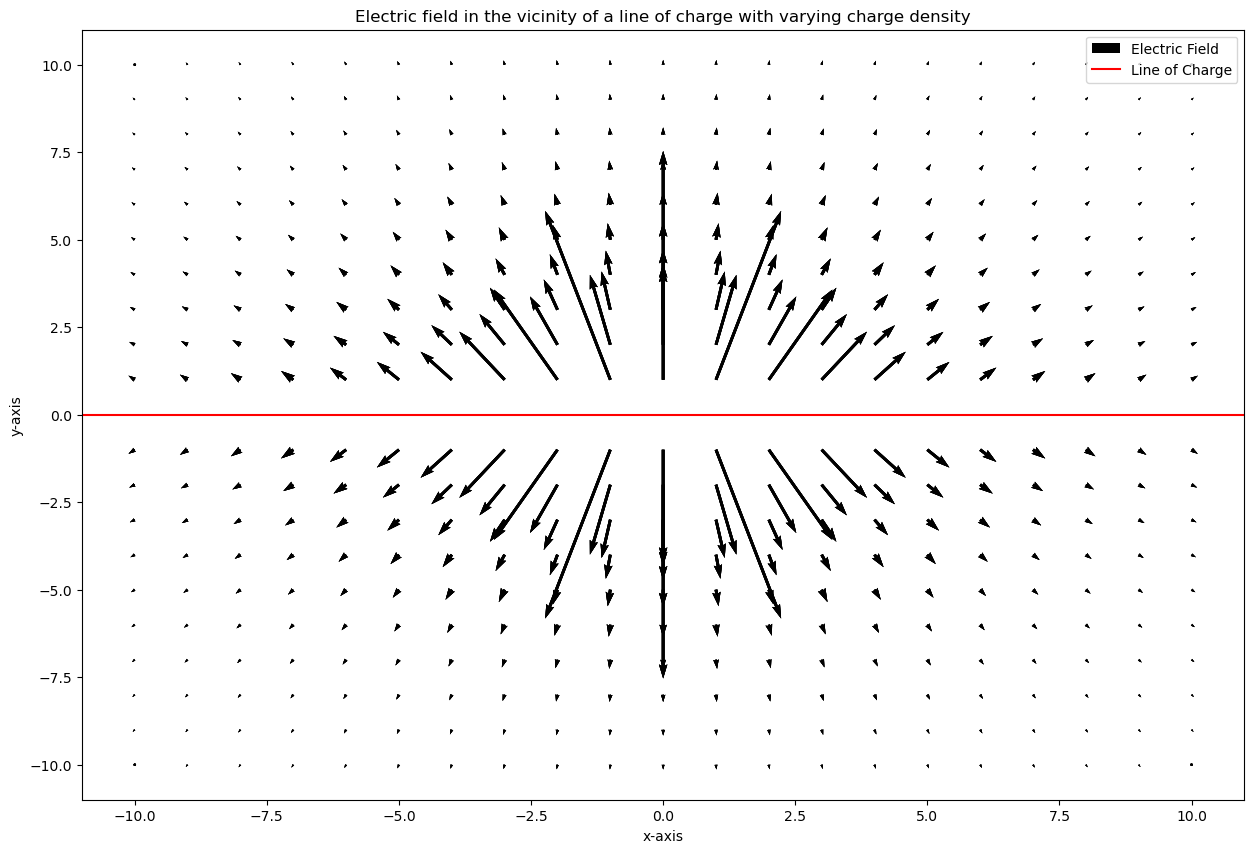

In [ ]:
# assigned Ex and Ey to empty lists before adding the integrated values
e_x = np.zeros(1680)
e_y = np.zeros(1680)

for i in range(1680):
    e_field_vec = e_field(x_values[i], y_values[i])
    e_x[i] = e_field_vec[0]
    e_y[i] = e_field_vec[1]

# plotting the electric field diagram in relation to a line of charge at y = 0
plt.figure(figsize=(15,10))
plt.quiver(x_values, y_values, e_x, e_y, label = 'Electric Field')
plt.axhline(y=0, color = 'r', label = 'Line of Charge')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Electric field in the vicinity of a line of charge with varying charge density')
plt.legend(loc = 'upper right')
plt.show()

The graph above shows the electric field of a line of charge. Physically, we can see that closer to the line the electric field is greater, as from that position it seems as though the line of charge extends to infinity. Although further from the line of charge the electric field lessens. This is because from positions close to the end of the diagram see the line as a point charge.

## Any Other Problem

<font color = blue>
Come up with a physical problem (different from the ones analyzed above) that yo can use Simpson's method to solve.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.

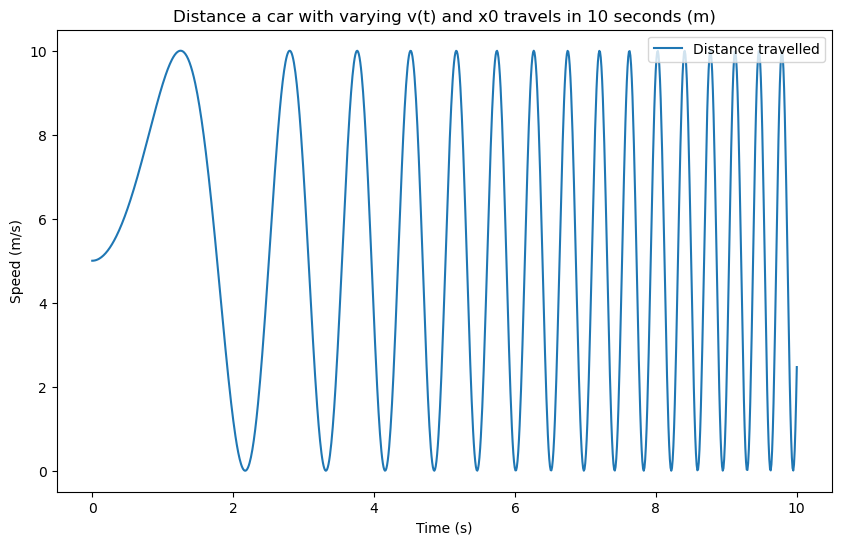

Total distance traveled in 10 seconds is 1002.92 meters or 0.62 miles


In [ ]:
# distance a car can travel in 10 seconds with varying speed.
def v(t,x):
    'Velocity equation I came up with with varying speed'
    return x + 5*np.sin(t**2)

x_values = np.linspace(0, 100, 100)
distances = np.array([])

for x in x_values:
    def fixed_v(t):
        return v(t, x)

    distance = i_simpson(fixed_v, 0, 10, 1000)
    distance = np.append(distance, distance)

fixed_x = 5
time_values = np.linspace(0, 10, 1000)
speed_values = v(time_values, fixed_x)

plt.figure(figsize = (10,6))
plt.plot(time_values, speed_values, label = 'Distance travelled')
plt.title('Distance a car with varying v(t) and x0 travels in 10 seconds (m)')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.legend(loc = 'upper right')
plt.show()
print(f'Total distance traveled in 10 seconds is {distance[0]:.2f} meters or {distance[0]/1609:.2f} miles')

The problem above takes a function of velocity which takes two inputs: time and initial speed. I then used i_simpson to determine the distance the car travels in 10 seconds. Origninally, it was a function of one variable, just v(t). But adding another component such as initial speed (x) is more complex. Physically speaking, the graph shows how the car speeds up and slows down over the course of 10 seconds and the distance it travels with the given changes in speed and starting speed. While time varies throughout the i_simpson function, the initial speed can be changed in the code but does no fluctuate in the graph above.